# if-for

Reference https://jirlong.gitbook.io/pytutorial/python-basic/4.-if-else-for

**`if`的應用**
* 選擇性列印出你所要呈現的youbike站台：指定要某幾個、透過if來判斷，指定要滿載的
* 透過比較來找到最大值和最小值
* 處理缺漏值，AQX不定期地會有缺漏值，要用`if`來偵測是否有缺漏值，並指定遇到缺漏值要怎麼做處理。或者是查驗輸入的日期是否合理

**``for if``應用**
* 把所有文字看過一遍，計算文字的出現次數
* 用`for`遍歷PM2.5的值來對PM2.5做排序，找到最大或者是前三大的PM2.5站台
* 分組。若告訴一個使用者PM2.5是67，他可能不知道這個數字代表什麼意義，但你若透過一個標準的Mapping把它mapping到非常高、高、中、低、非常低等五個等級，並告訴使用者說現在這個區域PM2.5是高，那他就聽得懂。

# The AQX case

**範例說明**：從資料來源為行政院環保署的空氣品質監測網（[PM2.5 introduced by 行政院環保署](https://taqm.epa.gov.tw/taqm/tw/default.aspx)）可以看到即時的空氣品質，包含指標和嚴重程度（上顏色）。上顏色的方法是依照AQI的值分成六個等級。當要把AQI值繪製為相對應的等級時，必須要判斷AQI值落在哪一個區間，此時，需要用if-else的條件判斷式來判斷，究竟是落在哪個區間。而測站不會只有一個，因此，要一個接一個判斷完現在所有的測站落在哪一個區間的話，那就要用for-loop來判斷完所有的測站。

**資料來源**：行政院環保署有一個自己的開放資料網站https://opendata.epa.gov.tw ，即時更新的速度會比政府開放資料平台快。以下三個連結都可以獲取空氣品質資料。
1. http://opendata.epa.gov.tw/webapi/Data/REWIQA/?$orderby=SiteName&$skip=0&$top=1000&format=json
2. https://taqm.epa.gov.tw/taqm/aqs.ashx?act=WebCamBox&lang=tw
3. https://taqm.epa.gov.tw/taqm/aqs.ashx?lang=tw&act=aqi-epa&ts=1538460570145

**分析策略**：看到空氣品質的資料，或類似的資料（例如水污染、噪音、紫外線）一般會想要做什麼事？
1. 找到突出的（Prominent）資料：找到最嚴重的地區。如果最嚴重的地區不只一個，那就要列印出多個地區。要做這件事就要找到最大值或者是最小值。在程式的邏輯上就是把所有資料看過一遍，透過大小比較，找出最大的那個值。
2. 找到突出的（Prominent）資料：不僅找到最嚴重的地區，還要找到前三大、前五大、前10％。在程式的邏輯上，就要做排序。以由大到小來排序的狀況來說，要用前面的方法，找到最大值，再從剩下的找出次大值、再從剩下的找出次大值，依此類推。
3. 獲取資料摘要。例如平均值、四分位數、左/右傾分佈（常態分配、Power low）。
4. 描述資料分佈。雖然知道平均值或四分位數等已經能夠知道部分資料的概況，但通常會需要知道資料分布的概況，例如空氣品質差的地方多，還是好的地方多？或者是空氣品質在每個不同的等級的，各有幾個測站？這程式的基本邏輯通常是分堆或分類後進行計數（Counting），或者是單就數值直接進行Counting。
5. 篩選出目標觀察資料：例如，比較大都市內或非大都市的測站，看看PM2.5或者O3比較嚴重。

* 為什麼要找到這些資料的概況？簡單地說，是為了讓一般人聽得懂，但要求有憑有據。只有資料的分析者和操作者看得到資料，但重點是你今天通常為什麼要做資料分析，是因為你想要傳達給別人，這筆資料有啥特殊之處，或者他平淡無奇。但為了做到這點，你需要用一個他們都聽得懂的語彙，例如「大部分的區域」、「最嚴重的區域」、「前幾大」。然而，這些語彙的邏輯實際上都模糊而不準確，但若你有資料和數學的支持，你就可以說得有信心，有憑有據，而不至於信口開河。

## Loading AQX data

In [48]:
import requests
import json
url = " https://taqm.epa.gov.tw/taqm/aqs.ashx?lang=tw&act=aqi-epa&ts=1538460570145"
response = requests.get(url)
aqdata = json.loads(response.text)
print(type(aqdata))

<class 'dict'>


### Exploring content of aqdata

dict_keys(['Result', 'Data'])
<class 'list'>
{'SiteId': '84', 'SiteName': '富貴角', 'SiteKey': 'FugueiCape', 'AreaKey': 'North', 'MonobjName': '背景', 'Address': '新北市石門區富貴角海邊', 'lat': '25.294147', 'lng': '121.539141', 'AQI': '74', 'MainPollutant': '臭氧八小時', 'MainPollutantKey': 'O3_8hr', 'CityCode': '31', 'PM10': '56', 'PM10_AVG': '42', 'PM25': '21', 'PM25_AVG': '19', 'O3': '66', 'O3_8': '62', 'SO2': '', 'CO': '', 'CO_8': '0.30', 'NO2': '', 'SO2_VFLAG': '3', 'CO_VFLAG': '3', 'O3_VFLAG': '1', 'PM10_VFLAG': '1', 'NO2_VFLAG': '3', 'THC_VFLAG': '1', 'PM25_VFLAG': '1', 'SO2_PRETXT': '儀器校正', 'CO_PRETXT': '儀器校正', 'O3_PRETXT': '', 'NO2_PRETXT': '儀器校正', 'PM10_PRETXT': '', 'PM25_PRETXT': '', 'HO_AQI_VAL': '74', 'THC': '2', 'x': '121', 'y': '86', 'DataSrc': 'epa', 'Time': '2020-03-23 12:00:00', 'AQIStyle': 'AQI2'}
dict_keys(['SiteId', 'SiteName', 'SiteKey', 'AreaKey', 'MonobjName', 'Address', 'lat', 'lng', 'AQI', 'MainPollutant', 'MainPollutantKey', 'CityCode', 'PM10', 'PM10_AVG', 'PM25', 'PM25_AVG', 'O

## Print out data by for-loop

print formation rules https://docs.python.org/3/tutorial/inputoutput.html

In [56]:


#     print("{}\t{}\t{}".format(site["SiteName"], site["AQI"], site["PM25"]))

富貴角 74 21
萬里 62 -1
淡水 38 7
林口 63 11
三重 65 14
菜寮 47 9
汐止 66 21
新莊 58 -1
永和 57 14
板橋 53 9
土城 62 12
新店 59 12
陽明 47 ND
士林 44 8
大同 57 12
中山 53 
松山 62 16
萬華 52 10
古亭 60 17
基隆 61 16
大園 68 27
觀音 67 22
桃園 58 7
平鎮 78 
中壢 71 17
龍潭 68 10
新竹 80 
湖口 72 21
竹東 66 11
頭份 95 
苗栗 78 24
三義 72 32
豐原 71 24
沙鹿 89 33
西屯 78 32
忠明 74 28
大里 80 23
線西 92 31
彰化 80 33
二林 99 40
埔里 89 24
南投 86 31
竹山 92 43
崙背 102 36
麥寮 89 32
臺西 86 32
斗六 90 
新港 98 41
朴子 97 41
嘉義 96 
新營 99 43
善化 94 40
安南 104 40
臺南 93 30
美濃 71 
橋頭 90 40
楠梓 90 38
仁武 86 29
左營 85 
前金 84 36
鳳山 73 29
復興 77 
前鎮 81 43
小港 78 33
大寮 97 46
林園 75 25
屏東 81 33
潮州 79 38
恆春 57 15
宜蘭 59 7
冬山 67 12
花蓮 65 19
關山 54 10
臺東 55 16
馬祖 80 21
金門 73 29
馬公 74 32
臺南(麻豆) 94 35
彰化(大城) 76 29
新北(樹林) 65 13
屏東(琉球) 65 18
高雄(楠梓) 92 41
桃園(觀音工業區) 77 28


## Updating missing PM2.5 value

在這個例子中，由於我發現PM2.5偶而會有空值（就該場站的資料沒有傳回來），我可以用`for`-each掃過所有的資料，然後用`if`來判斷，如果資料是空值的話（如下面的空字串`""`或者被標示為`ND`），就把`-1`assign給他，不然的話就保留原本的數值，或是像下面一樣，用`int()`把它轉為整數。我在`for`-each掃過所有資料時，我用了一個變數`site`，他的效果相當於把`aqdata["Data"]`裡面的每一個項目走訪一遍，當`site`內容被改變時，`aqdata["Data"]`的內容也會一併被改變。

In [58]:




# print out the first 10 records for glimpse
for site in aqdata["Data"][:10]:
    print(site["SiteName"], site["AQI"], site["PM25"])


富貴角 74 21
萬里 62 -1
淡水 38 7
林口 63 11
三重 65 14
菜寮 47 9
汐止 66 21
新莊 58 -1
永和 57 14
板橋 53 9


## Using index to update data (Another way)

我也可以透過index去access`aqdata["Data"]`中第0個、第1個、第2個dict的內容。但此時你就要去用index存取`aqdata["Data"]`內的值，你的程式碼會稍微長一點點。

In [59]:
# for site in aqdata["Data"]:




# print out the frist 10 records for glimpse
for site in aqdata["Data"][:10]:
    print(site["SiteName"], site["AQI"], site["PM25"])

富貴角 74 21
萬里 62 -1
淡水 38 7
林口 63 11
三重 65 14
菜寮 47 9
汐止 66 21
新莊 58 -1
永和 57 14
板橋 53 9


## Using enumerate() to access index and data

前面我們介紹到兩個版本，
1. `for site in aqdata["Data"]:`是用`site`來直接存取所有的資料項目，
2. `for i in range(len(aqdata["Data"])):`的做法則是用`i`作為index來提供存取原本的`aqdata["Data"]`。

但其實還有第三種選擇就是用`enumerate()`來同時存取index和資料項目，當我需要access這是第幾個項目，或者需要access原本的項目值時，那我就用index，但我如果只是要判斷一下大小，那我就可以用被取出來的資料項目。寫法如下：

`for i, site in enumerate(aqdata["Data"]):`

In [61]:
print(type(enumerate(aqdata["Data"])))






for site in aqdata["Data"][:10]:
    print(site["SiteName"], site["AQI"], site["PM25"])

<class 'enumerate'>
富貴角 74 21
萬里 62 -1
淡水 38 7
林口 63 11
三重 65 14
菜寮 47 9
汐止 66 21
新莊 58 -1
永和 57 14
板橋 53 9


# Rescale AQI index

前面說到一般民眾其實不太了解AQI數值的意義，也不知道最大最小值是多少，所以跟民眾講AQI的數值是沒意義的。民眾比較容易了解的是「現在嚴不嚴重」。因此，我們可以依照環保署對於空氣品質的等級劃分方法來將所有站台區分成幾個等級。程式邏輯上要做的事情是，用if-elif-else來設計好不同的區間判斷，然後用for-loop把所有AQI的值走訪過一遍，看每個站台落入哪個區間。

環保署的標準：https://taqm.epa.gov.tw/taqm/tw/b0201.aspx

In [23]:
for i, site in enumerate(aqdata["Data"]):
    if site["AQI"] == "":
        aqdata["Data"][i]["Quality"] = "Unknown"
    ## add more role here

for site in aqdata["Data"]:
    print(site["SiteName"], "\t", site["Quality"])

富貴角 	 OK
萬里 	 OK
淡水 	 OK
林口 	 OK
三重 	 OK
菜寮 	 OK
汐止 	 OK
新莊 	 OK
永和 	 OK
板橋 	 OK
土城 	 OK
新店 	 OK
陽明 	 OK
士林 	 OK
大同 	 OK
中山 	 OK
松山 	 OK
萬華 	 OK
古亭 	 OK
基隆 	 OK
大園 	 OK
觀音 	 OK
桃園 	 OK
平鎮 	 OK
中壢 	 OK
龍潭 	 OK
新竹 	 OK
湖口 	 OK
竹東 	 OK
頭份 	 OK
苗栗 	 OK
三義 	 OK
豐原 	 OK
沙鹿 	 OK
西屯 	 OK
忠明 	 OK
大里 	 OK
線西 	 OK
彰化 	 OK
二林 	 OK
埔里 	 bad
南投 	 OK
竹山 	 OK
崙背 	 OK
麥寮 	 OK
臺西 	 OK
斗六 	 OK
新港 	 OK
朴子 	 OK
嘉義 	 OK
新營 	 OK
善化 	 OK
安南 	 OK
臺南 	 OK
美濃 	 OK
橋頭 	 OK
楠梓 	 OK
仁武 	 OK
左營 	 OK
前金 	 OK
鳳山 	 OK
復興 	 OK
前鎮 	 OK
小港 	 OK
大寮 	 OK
林園 	 OK
屏東 	 OK
潮州 	 OK
恆春 	 OK
宜蘭 	 OK
冬山 	 OK
花蓮 	 OK
關山 	 OK
臺東 	 OK
馬祖 	 bad
金門 	 OK
馬公 	 OK
臺南(麻豆) 	 OK
彰化(大城) 	 OK
新北(樹林) 	 OK
屏東(琉球) 	 OK
高雄(楠梓) 	 OK
桃園(觀音工業區) 	 OK


### Practice: AQI by epa's standard

https://taqm.epa.gov.tw/taqm/en/default.aspx

| Label | Range   |
|------|------|
|Good|0~50|
|Moderate|51~100|
|Unhealthy for Sensitive Groups|101~150|
|Unhealthy|151~200|
|Very Unhealthy|201~300|
|Hazardous|301~500|

### (Option) Rescale better

為了避免過多的if-elif-else或者switch的使用，可以先把scale和category寫成兩個List，然後用多一層for-loop來trace該value會落在List的哪個區間。

In [24]:
degree = ['L', 'L', 'L', 'M', 'M', 'M', 'H', 'H','H', 'vH']
scaler = [11, 23, 35, 41, 47, 53, 58, 64, 70, 1000]

for site in aqdata["Data"]:
    if site['PM25'] != "":
        for i, n in enumerate(scaler):
            if int(site['PM25']) < n:
                d = i
                break     
        print(int(site['PM25']), site['SiteName'], d+1, degree[d])

16 富貴角 2 L
26 萬里 3 L
20 淡水 2 L
27 林口 3 L
25 三重 3 L
22 菜寮 2 L
20 汐止 2 L
25 新莊 3 L
22 永和 2 L
22 板橋 2 L
24 土城 3 L
19 新店 2 L
8 陽明 1 L
22 士林 2 L
20 大同 2 L
21 中山 2 L
21 松山 2 L
20 萬華 2 L
25 古亭 3 L
18 基隆 2 L
23 大園 3 L
17 觀音 2 L
22 桃園 2 L
25 平鎮 3 L
22 中壢 2 L
25 龍潭 3 L
21 新竹 2 L
19 湖口 2 L
24 竹東 3 L
19 頭份 2 L
28 苗栗 3 L
27 三義 3 L
28 豐原 3 L
26 沙鹿 3 L
18 西屯 2 L
26 忠明 3 L
24 大里 3 L
19 線西 2 L
18 彰化 2 L
23 二林 3 L
43 埔里 5 M
29 南投 3 L
29 竹山 3 L
22 崙背 2 L
18 麥寮 2 L
16 臺西 2 L
24 斗六 3 L
20 新港 2 L
22 朴子 2 L
19 嘉義 2 L
22 新營 2 L
21 善化 2 L
20 安南 2 L
16 臺南 2 L
17 美濃 2 L
22 橋頭 2 L
20 楠梓 2 L
20 仁武 2 L
19 左營 2 L
20 前金 2 L
13 鳳山 2 L
18 復興 2 L
16 前鎮 2 L
17 小港 2 L
20 大寮 2 L
25 林園 3 L
23 屏東 3 L
25 潮州 3 L
21 恆春 2 L
17 宜蘭 2 L
20 冬山 2 L
22 花蓮 2 L
14 關山 2 L
9 臺東 1 L
26 馬祖 3 L
21 金門 2 L
11 馬公 2 L
23 臺南(麻豆) 3 L
14 彰化(大城) 2 L
31 新北(樹林) 3 L
19 屏東(琉球) 2 L
23 高雄(楠梓) 3 L
24 桃園(觀音工業區) 3 L


# Detect prominant data

通常我們有了這類的資料後，第一個想到的分析方法就是找到最嚴重、最差、變化最劇烈的地區。以下這是個非常好的例子說明要如何運用`if`和`for`找出PM2.5最高的地區。在過程中，必須要注意，原本的資料的資料型態為何，甚至要注意，原本的資料是否有缺漏。在這個案例中，我希望找出，現在PM2.5最高的是哪些站台，且把該站台列印出來。注意，我要列印的是，PM2.5最高的站台，而不是最高的PM2.5值；此外還要注意，PM2.5最高的站台可能不只一個（這時候該怎麼處理？）。

## Find the maximum

找到最大值或最小值的概念：就個人的邏輯思考一下，我要怎麼找到一群數的最大值？解題邏輯：把第一個數先拿來當標準，之後確認過每個數，有沒有比這個數更大的，若有的話，最大值就是找到的那個數，沒有的話，那第一個數就是最大值。


In [63]:
# finding the maximum value
alist = [5, 3, 2, 4, 1, 3, 2, 4, 7, 82, 19, 23, 42]

# mina, maxa = 100, 0
mina = alist[0]




#     print maxa, a
print(mina)

1


### Use built-in functions

這類比較大小的簡單功能一定都有人幫忙寫好了（如以下的例子），只要記得使用它就好。但是，要記得這樣的函式其實就是透過類似上述方法來比較大小以找到最大值。

In [64]:
print(min(alist), max(alist), sum(alist), len(alist), float(sum(alist))/len(alist))

1 82 197 13 15.153846153846153


### Find the sites with the maximum PM2.5 value

接下來我們將以上述的演算邏輯來找到PM2.5最高的那個site。我們先用上述的核心邏輯來找到最大值（下方的`max_value`）為何，然後再用一個`for`-loop把所有站台看一遍，看看哪些站台的PM2.5值等於`max_value`。

In [65]:
print(aqdata["Data"][0].keys())

# Initialize a very small maximum value
max_value = 0

# Compare to see if any one larger than the maximum value
for site in aqdata["Data"]:
    # add code here
    
print("The maximum PM2.5 value: ", max_value)

# Traverse all sites by for loop to see whose value equals to the maximum PM2.5 value
for site in aqdata["Data"]:
    if int(site['PM25']) == max_value:
        print(site['SiteName'], max_value)

dict_keys(['SiteId', 'SiteName', 'SiteKey', 'AreaKey', 'MonobjName', 'Address', 'lat', 'lng', 'AQI', 'MainPollutant', 'MainPollutantKey', 'CityCode', 'PM10', 'PM10_AVG', 'PM25', 'PM25_AVG', 'O3', 'O3_8', 'SO2', 'CO', 'CO_8', 'NO2', 'SO2_VFLAG', 'CO_VFLAG', 'O3_VFLAG', 'PM10_VFLAG', 'NO2_VFLAG', 'THC_VFLAG', 'PM25_VFLAG', 'SO2_PRETXT', 'CO_PRETXT', 'O3_PRETXT', 'NO2_PRETXT', 'PM10_PRETXT', 'PM25_PRETXT', 'HO_AQI_VAL', 'THC', 'x', 'y', 'DataSrc', 'Time', 'AQIStyle'])
The maximum PM2.5 value:  46
大寮 46


### Practice: finding top 3 site with highest PM2.5 values

# Find top n

## Sorted by `sorted` function

下列的程式碼想法如下：
1. 我先把所有的PM2.5的值給存起來，
2. 存起來以後，我用`sorted()`這個函式把這些值做排序。
3. 排序後的List我就很方便取一個閾值（最大值、前四分之一大的值或者是前三大的值）。
4. 然後我把大於該閾值的站台都給列印出來，即為所求。

In [79]:
## Use a list to store all PM2.5 value
pm_list = []
for site in aqdata["Data"]:

        
## sort the list by sorted()


print(pm_list)

43


## Print out the site which values are larger than the first quarter

In [76]:
print(pm_list[int(len(pm_list)/4)])

for site in aqdata["Data"]:
    if int(site['PM25']) >= pm_list[int(len(pm_list)/4)]:
        print(site['SiteName'], site['PM25'])

21
富貴角 21
汐止 21
大園 27
觀音 22
湖口 21
苗栗 24
三義 32
豐原 24
沙鹿 33
西屯 32
忠明 28
大里 23
線西 31
彰化 33
二林 40
埔里 24
南投 31
竹山 43
崙背 36
麥寮 32
臺西 32
新港 41
朴子 41
新營 43
善化 40
安南 40
臺南 30
橋頭 40
楠梓 38
仁武 29
前金 36
鳳山 29
前鎮 43
小港 33
大寮 46
林園 25
屏東 33
潮州 38
馬祖 21
金門 29
馬公 32
臺南(麻豆) 35
彰化(大城) 29
高雄(楠梓) 41
桃園(觀音工業區) 28


## Print out sites with top 3 serious values

In [72]:
# print(sorted(pm_list, reverse=True)[3])
for site in aqdata["Data"]:
    ## Add code here

## Implement `sorted` function by sorting algorithm

在前面的例子我用了一個`sorted`函式就排序了所有的PM2.5的值，那這類`sorted`函式是怎麼寫的呢？我們可以用兩層的排序演算法來達成此事。觀念很簡單：
1. 我先抓住第一個，一一和後面比較，看看有沒有人比他大，有的話，就和後面做置換（Swap），沒有的話就不動，這樣跑過一輪，就可以保證第一個最大。
2. 接下來抓住第二個，一一和後面比較，看看有沒有人比他大，，有的話，就和後面做置換（Swap），沒有的話就不動，這樣跑過一輪，就可以保證第二個是次大的。
3. 依此類推。

Reference
1. https://www.geeksforgeeks.org/bubble-sort/
2. https://en.wikipedia.org/wiki/Bubble_sort


In [83]:
pm_list = []
site_list = []
for site in aqdata["Data"]:
    if site['PM25'] != "" or site['PM25'] != "ND":
        pm_list.append(int(site['PM25']))
        site_list.append(site['SiteName'])
        
for i in range(len(pm_list)):
    for j in range(i+1, len(pm_list)):
        if pm_list[i] < pm_list[j]:
            pm_list[i], pm_list[j] = pm_list[j], pm_list[i]

print(pm_list)

[46, 43, 43, 43, 41, 41, 41, 40, 40, 40, 40, 38, 38, 36, 36, 35, 33, 33, 33, 33, 32, 32, 32, 32, 32, 31, 31, 30, 29, 29, 29, 29, 28, 28, 27, 25, 24, 24, 24, 23, 22, 21, 21, 21, 21, 19, 18, 17, 17, 16, 16, 16, 15, 14, 14, 13, 12, 12, 12, 12, 11, 11, 10, 10, 10, 9, 9, 8, 7, 7, 7, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1]


# The Youbike Case

## Loading data

In [84]:
import requests
import json
response = requests.get('https://tcgbusfs.blob.core.windows.net/blobyoubike/YouBikeTP.gz')
print(type(response)) # <class 'requests.models.Response'>
print(type(response.text)) # <class 'str'>
bike_data = json.loads(response.text)

<class 'requests.models.Response'>
<class 'str'>


## Calculate "Fullness"
* 目標：假設我用`perc = sbi/tot`現有腳踏車數除以總腳踏車格數作為滿站的比例，並希望每個站的資料中多一個key為`perc`來存放滿站比例

In [85]:
for k in bike_data['retVal']:
    bike_data['retVal'][k]["perc"] = # 

for k in bike_data["retVal"]:
    print("{0:20s}\t{1:.2f}".format(bike_data['retVal'][k]["sna"], bike_data['retVal'][k]["perc"]))

捷運市政府站(3號出口)        	0.51
捷運國父紀念館站(2號出口)      	0.31
台北市政府               	0.10
市民廣場                	0.72
興雅國中                	0.22
臺北南山廣場              	0.34
信義廣場(台北101)         	0.41
世貿三館                	0.63
松德站                 	0.38
台北市災害應變中心           	0.46
三張犁                 	0.40
臺北醫學大學              	0.52
福德公園                	0.10
榮星花園                	0.50
松山家商                	0.38
民生光復路口              	0.59
臺北市藝文推廣處            	0.15
象山公園                	0.40
捷運科技大樓站             	0.10
民生敦化路口              	0.39
松山車站                	0.23
東新國小                	0.59
信義建國路口              	0.02
永吉松信路口              	0.03
捷運昆陽站(1號出口)         	0.43
捷運南港展覽館站(5號出口)      	0.03
五常公園                	0.06
金山愛國路口              	0.35
基隆長興路口              	0.58
辛亥新生路口              	0.90
捷運六張犁站              	0.08
中崙高中                	0.52
捷運行天宮站(1號出口)        	0.31
捷運行天宮站(3號出口)        	0.33
臺大資訊大樓              	0.88
捷運東門站(4號出口)         	0.04
臺灣師範大學(圖書館)         	0.09
南港世貿公園              	0.23
玉成公園        

## Save bike data to .json

在Python中把資料dump成json會遠比csv來得方便，在R中則剛好相反。原因是Python的dictionary與list兩項資料結構恰好json的格式一一相符，所以非常容易就可以把資料dump出去或者read進來。如果是要dump成csv檔的話，就必須想辦法把資料整理成pandas dataframe的二維型態。


In [86]:
json.dump(bike_data, open('ubike.json', 'w'))

## filtering and rescaling

一個簡單的測試，看看有多少站台他腳踏車站已經七成滿了（代表騎車過去可能會沒地方停）。

In [87]:
for k, v in bike_data['retVal'].items():
    if float(v['sbi'])/int(v['tot']) > 0.7:
        print(k, v['sna'], v['sbi'], v['tot'])
        print("-"*30)


0004 市民廣場 43 60
------------------------------
0031 辛亥新生路口 27 30
------------------------------
0036 臺大資訊大樓 63 72
------------------------------
0047 捷運忠孝新生站(4號出口) 24 34
------------------------------
0056 仁愛林森路口 32 42
------------------------------
0078 捷運圓山站(2號出口) 41 52
------------------------------
0113 仁愛逸仙路口 31 38
------------------------------
0142 捷運木柵站 38 52
------------------------------
0154 中正基河路口 30 38
------------------------------
0166 臺北市立景美女中 26 34
------------------------------
0172 捷運南京三民站(1號出口) 18 24
------------------------------
0175 捷運南京復興站(5號出口) 38 52
------------------------------
0182 捷運古亭站(2號出口) 42 50
------------------------------
0204 臺北市立大學(天母校區) 31 42
------------------------------
0209 捷運復興崗站 32 42
------------------------------
0249 中華桂林路口 25 32
------------------------------
0255 光復南路22巷口 25 30
------------------------------
0267 八德中坡路口 31 38
------------------------------
0281 松江公園 23 32
------------------------------
0293 自來水園區 35 40
----------------

# For
無論是在列數「水果」或者把所有腳踏車站的資訊列印出來，都需要用到一個指令__For__。他會讓程式在指定的範圍內重複執行，所以也經常被稱為__for-each__。

## For  - to sum all values in a list

In [3]:
# accmulate all sbi
sbi_sum = 0
tot_sum = 0
for site in bike_data['retVal'].keys():

    
    
print sbi_sum, tot_sum

495
Enter an n>100
5050


NameError: name 'bike_data' is not defined

## For - accumulated something according to index of list or key of dictionary

In [13]:
grades = [60, 65, 62, 65, 62, 73, 78, 90, 100, 99, 67, 73]
glist = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
print(len(glist))





11
[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[5, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[5, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[5, 2, 0, 1, 0, 0, 0, 0, 0, 0, 0]
[5, 2, 0, 1, 1, 0, 0, 0, 0, 0, 0]
[5, 2, 0, 2, 1, 0, 0, 0, 0, 0, 0]
[6, 2, 0, 2, 1, 0, 0, 0, 0, 0, 0]
[6, 3, 0, 2, 1, 0, 0, 0, 0, 0, 0]


## Assign values into equal length brackets

[9, 7, 3, 8, 5, 3, 7, 4, 8, 6]


(array([9., 7., 3., 8., 5., 3., 7., 4., 8., 6.]),
 array([ 0. ,  9.9, 19.8, 29.7, 39.6, 49.5, 59.4, 69.3, 79.2, 89.1, 99. ]),
 <a list of 10 Patch objects>)

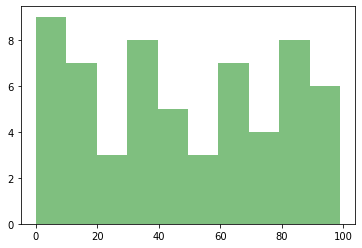

In [15]:
grades = [17, 65, 5, 74, 93, 1, 94, 16, 80, 95, 32, 78, 17, 70, 22, 43, 95, 67, 3, 30, 40, 51, 96, 17, 13, 21, 4, 47, 19, 44, 59, 6, 0, 83, 40, 89, 39, 57, 99, 35, 81, 31, 89, 63, 80, 85, 36, 60, 17, 68, 62, 36, 3, 28, 8, 38, 83, 73, 67, 2]
glist = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]




%matplotlib inline
import matplotlib.pyplot as plt



## Practice: Generating fibonnacci sequence
 費氏數列第一個為0，第二個為1，第三者之後為前兩項相加，請問第10項是多少？
 請嘗試將你的答案列印為以下的模樣
 ```
1 	 1
2 	 2
3 	 3
4 	 5
5 	 8
6 	 13
7 	 21
8 	 34
9 	 55
10 	 89
```

In [42]:
## Generating fibonnacci number sequence
# 0, 1, 1, 2, 3, 5, 8, 13, 21, 34, 55, ...
a, b = 0, 1





1 	 1
2 	 2
3 	 3
4 	 5
5 	 8
6 	 13
7 	 21
8 	 34
9 	 55
10 	 89


## Generating Pi

Gregory and Leibniz found Pi/4 = 1 - 1/3 + 1/5 - 1/7 + 1/9...
https://mathworld.wolfram.com/PiFormulas.html



In [23]:
x, s = 0.0, 1




print(x)


3.1415919869232103


In [30]:
for i in range(10):

    
    
    

**********
*********
********
*******
******
*****
****
***
**
*


## Example Print 9x9 tables

 1*1 = 1   1*2 = 2   1*3 = 3   1*4 = 4   1*5 = 5   1*6 = 6   1*7 = 7   1*8 = 8   1*9 = 9  
 2*1 = 2   2*2 = 4   2*3 = 6   2*4 = 8   2*5 = 10  2*6 = 12  2*7 = 14  2*8 = 16  2*9 = 18 
 3*1 = 3   3*2 = 6   3*3 = 9   3*4 = 12  3*5 = 15  3*6 = 18  3*7 = 21  3*8 = 24  3*9 = 27 
 4*1 = 4   4*2 = 8   4*3 = 12  4*4 = 16  4*5 = 20  4*6 = 24  4*7 = 28  4*8 = 32  4*9 = 36 
 5*1 = 5   5*2 = 10  5*3 = 15  5*4 = 20  5*5 = 25  5*6 = 30  5*7 = 35  5*8 = 40  5*9 = 45 
 6*1 = 6   6*2 = 12  6*3 = 18  6*4 = 24  6*5 = 30  6*6 = 36  6*7 = 42  6*8 = 48  6*9 = 54 
 7*1 = 7   7*2 = 14  7*3 = 21  7*4 = 28  7*5 = 35  7*6 = 42  7*7 = 49  7*8 = 56  7*9 = 63 
 8*1 = 8   8*2 = 16  8*3 = 24  8*4 = 32  8*5 = 40  8*6 = 48  8*7 = 56  8*8 = 64  8*9 = 72 
 9*1 = 9   9*2 = 18  9*3 = 27  9*4 = 36  9*5 = 45  9*6 = 54  9*7 = 63  9*8 = 72  9*9 = 81 
